In [1]:
#import the libraries

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#import the dataset
df = pd.read_csv (r'D:\data analytic\project\porfolioProject\Python_Correlation\movies.csv')

In [2]:
#Let's look through the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
#Let's check the missing data
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print ('{} - {:.10%}'.format(col, pct_missing))

name - 0.0000000000%
rating - 1.0041731873%
genre - 0.0000000000%
year - 0.0000000000%
released - 0.0260824204%
score - 0.0391236307%
votes - 0.0391236307%
director - 0.0000000000%
writer - 0.0391236307%
star - 0.0130412102%
country - 0.0391236307%
budget - 28.3124673970%
gross - 2.4647887324%
company - 0.2217005738%
runtime - 0.0521648409%


In [4]:
#Create a copy of data
df_copy = df.copy()

In [5]:
#Drop all the missing data
df_copy = df_copy.dropna()

In [6]:
#Let's check the datatype of columns and the number of records
for col in df_copy.columns:
    pct_missing = df_copy[col].isnull().mean()
    print ('{} - {:.10%}'.format(col, pct_missing))

name - 0.0000000000%
rating - 0.0000000000%
genre - 0.0000000000%
year - 0.0000000000%
released - 0.0000000000%
score - 0.0000000000%
votes - 0.0000000000%
director - 0.0000000000%
writer - 0.0000000000%
star - 0.0000000000%
country - 0.0000000000%
budget - 0.0000000000%
gross - 0.0000000000%
company - 0.0000000000%
runtime - 0.0000000000%


In [7]:
#Change the data type of votes, director, star, country
df_copy['votes'] = df_copy['votes'].astype('int64')
df_copy['director'] = df_copy['director'].astype('string')
df_copy['star'] = df_copy['star'].astype('string')
df_copy['writer'] = df_copy['writer'].astype('string')
df_copy['country'] = df_copy['country'].astype('string')

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   int64  
 7   director  5421 non-null   string 
 8   writer    5421 non-null   string 
 9   star      5421 non-null   string 
 10  country   5421 non-null   string 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(4), int64(2), object(5), string(4)
memory usage: 677.6+ KB


In [9]:
#Drop duplicates
df_copy = df_copy.drop_duplicates()

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
pd.reset_option('display.max_columns', None)

In [12]:
pd.set_option('display.width', 2000)

In [15]:
df_copy['correct_year'] = df_copy['released'].apply(lambda x: x[x.index(",")+2 : x.index(",") + 6] if "," in x else "")

In [16]:
df_copy.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  year                                  released  score    votes                          director                            writer                       star                         country       budget         gross                                            company  runtime correct_year
5445                                             Avatar      PG-13     Action  2009         December 18, 2009 (United States)    7.8  1100000                     James Cameron                     James Cameron            Sam Worthington                   United States  237000000.0  2.847246e+09                              Twentieth Century Fox    162.0         2009
7445                                  Avengers: Endgame      PG-13     Action  2019            April 26, 2019 (United States)    8.4   903000                     Anthony Russo                Christopher Markus          Robert Downey Jr.                   United States  356000000.0  2.797501e+09                                     Marvel Studios    181.0         2019
3045                                            Titanic      PG-13      Drama  1997         December 19, 1997 (United States)    7.8  1100000                     James Cameron                     James Cameron          Leonardo DiCaprio                   United States  200000000.0  2.201647e+09                              Twentieth Century Fox    194.0         1997
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action  2015         December 18, 2015 (United States)    7.8   876000                       J.J. Abrams                   Lawrence Kasdan               Daisy Ridley                   United States  245000000.0  2.069522e+09                                          Lucasfilm    138.0         2015
7244                             Avengers: Infinity War      PG-13     Action  2018            April 27, 2018 (United States)    8.4   897000                     Anthony Russo                Christopher Markus          Robert Downey Jr.                   United States  321000000.0  2.048360e+09                                     Marvel Studios    149.0         2018
7480                                      The Lion King         PG  Animation  2019             July 19, 2019 (United States)    6.9   222000                       Jon Favreau                    Jeff Nathanson              Donald Glover                   United States  260000000.0  1.670728e+09                               Walt Disney Pictures    118.0         2019
6653                                     Jurassic World      PG-13     Action  2015             June 12, 2015 (United States)    7.0   593000                   Colin Trevorrow                        Rick Jaffa                Chris Pratt                   United States  150000000.0  1.670516e+09                                 Universal Pictures    124.0         2015
6043                                       The Avengers      PG-13     Action  2012               May 4, 2012 (United States)    8.0  1300000                       Joss Whedon                       Joss Whedon          Robert Downey Jr.                   United States  220000000.0  1.518816e+09                                     Marvel Studios    143.0         2012
6646                                          Furious 7      PG-13     Action  2015             April 3, 2015 (United States)    7.1   370000                         James Wan                      Chris Morgan                 Vin Diesel                   United States  190000000.0  1.515341e+09                                 Universal Pictures    137.0         2015
7494                                          Frozen II         PG  Animation  2019         November 22, 2019 (United States)    6.8   148000                        Chris Buck                      Jennifer Lee               Kristen Bell                   United States  150000000.0  1.450027e+09                      Walt Disney Animation Studios    103.0      

In [17]:
#Drop any duplicate to see whether it has any inconsistent name or not
df_copy['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

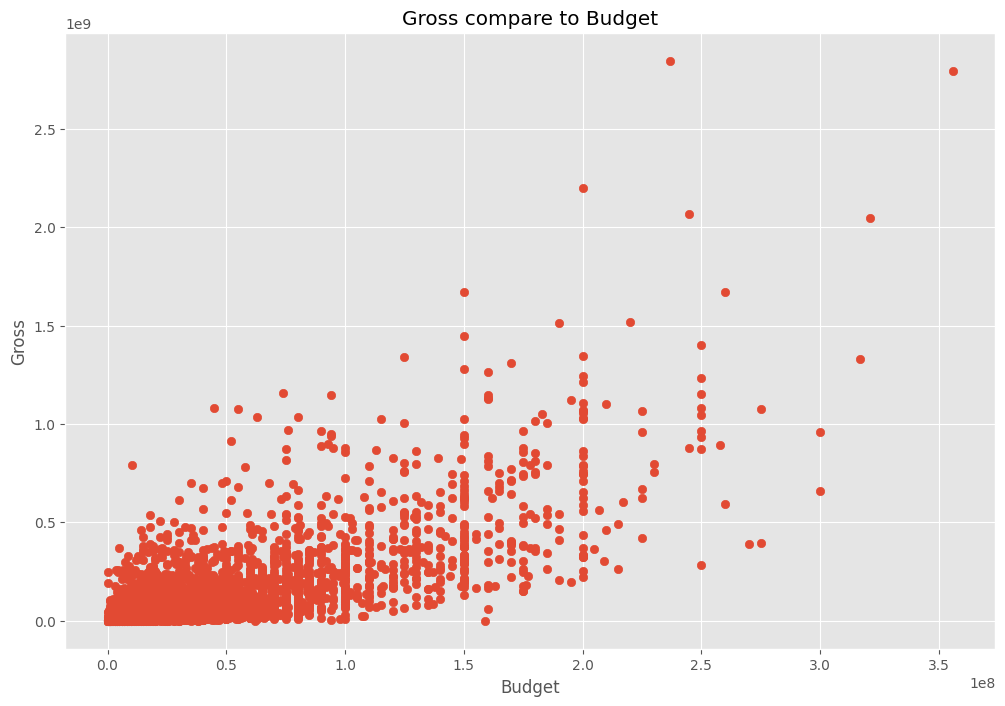

In [18]:
#Create scatter plots to see the correlations
plt.scatter(x=df_copy['budget'], y=df_copy['gross'])
plt.title('Gross compare to Budget')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

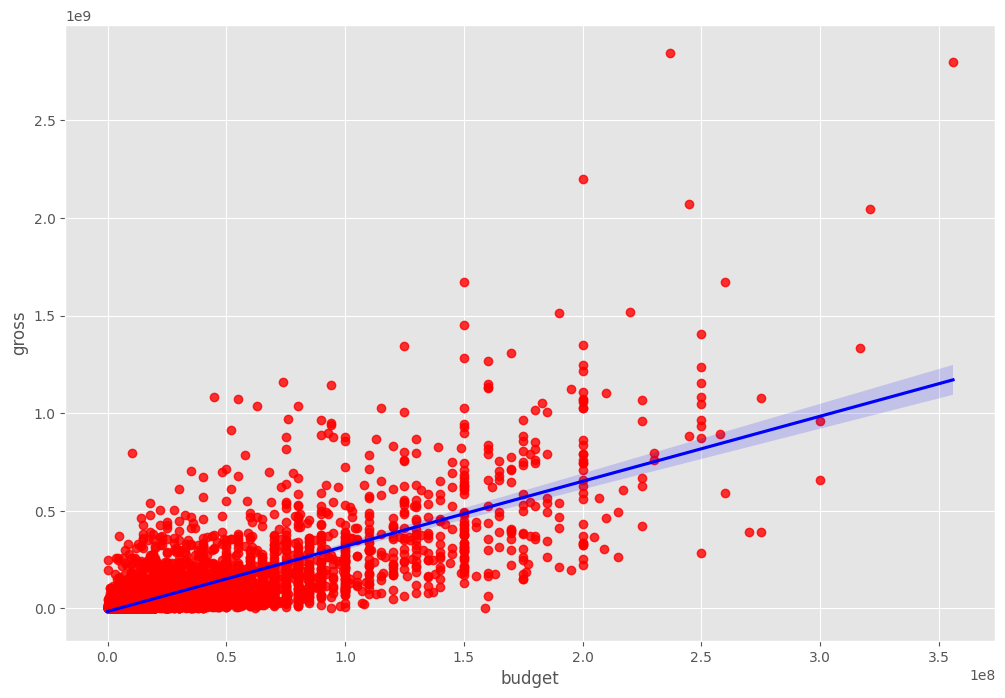

In [19]:
#Create scatter plot using Seaborn
sb.regplot(x='budget', y='gross', data=df_copy, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [20]:
#Look at the correlation
df_numeric = df_copy.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='spearman')
print (correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000


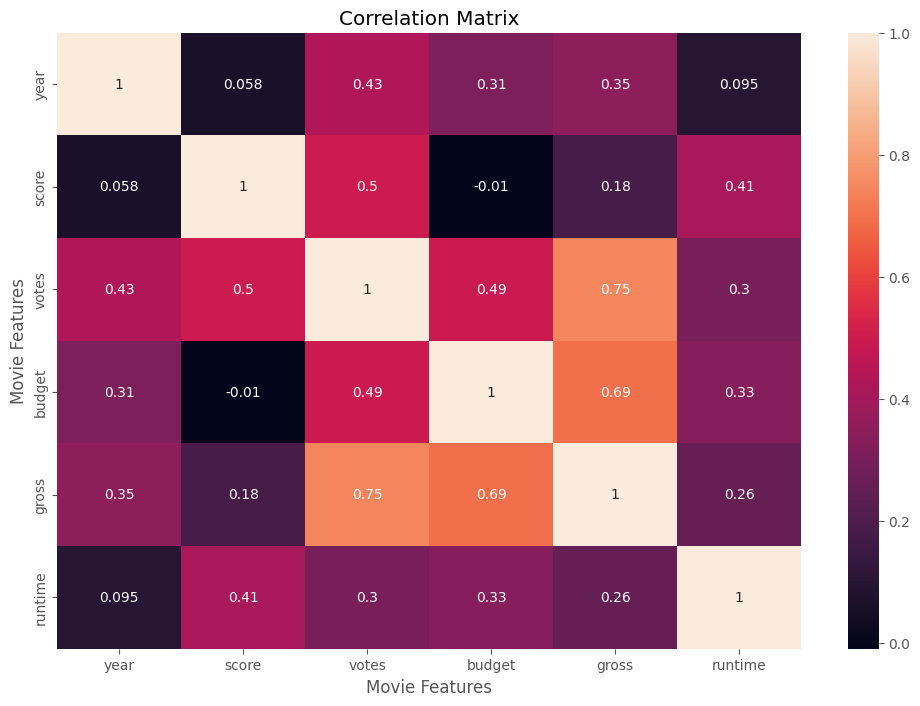

In [21]:
#Create heatmap to show the correlation matrix
sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
#Numerize the string type columns to observe the correlation
df_numerized = df_copy.copy()
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    elif df_numerized[col_name].dtype == "string":
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  star  country      budget        gross  company  runtime  correct_year
0  4692       6      6  1980      1304    8.4   927000      1795    2832   699       46  19000000.0   46998772.0     1426    146.0             1
1  3929       6      1  1980      1127    5.8    65000      1578    1158   214       47   4500000.0   58853106.0      452    104.0             1
2  3641       4      0  1980      1359    8.7  1200000       757    1818  1157       47  18000000.0  538375067.0      945    124.0             1
3   204       4      4  1980      1127    7.7   221000       889    1413  1474       47   3500000.0   83453539.0     1108     88.0             1
4   732       6      4  1980      1170    7.3   108000       719     351   271       47   6000000.0   39846344.0     1083     98.0             1

In [39]:
df_copy.head()

name rating      genre  year                       released  score    votes         director                   writer            star         country      budget        gross             company  runtime correct_year
0                                     The Shining      R      Drama  1980  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson  United Kingdom  19000000.0   46998772.0        Warner Bros.    146.0         1980
1                                 The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   58853106.0   Columbia Pictures    104.0         1980
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   United States  18000000.0  538375067.0           Lucasfilm    124.0         1980
3                                       Airplane!     PG     Comedy  1980   July 2, 1980 (United States)    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   United States   3500000.0   83453539.0  Paramount Pictures     88.0         1980
4                                      Caddyshack      R     Comedy  1980  July 25, 1980 (United States)    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   39846344.0      Orion Pictures     98.0         1980

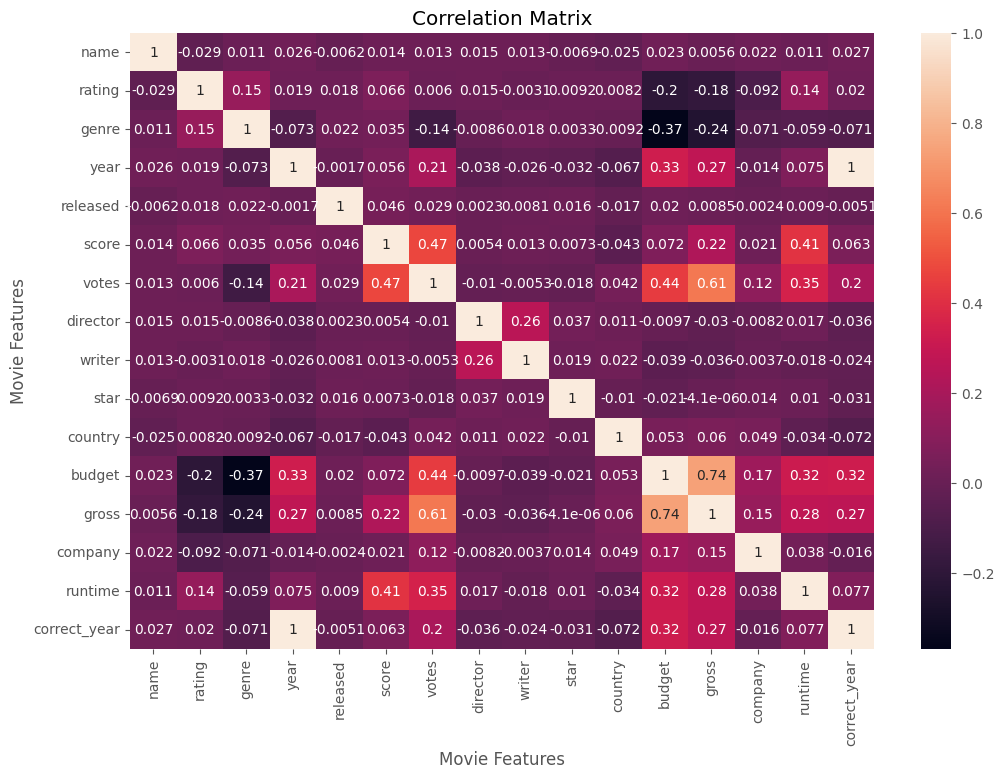

In [24]:
#Create a correlation heatmap for all attributes
correlation_matrix_all_columns = df_numerized.corr(method='pearson')
sb.heatmap(correlation_matrix_all_columns, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [30]:
#Break down and sort it to see the most correlation rate
corr_table= df_numerized.corr()
corr_list = corr_table.unstack()
sorted_corr_list = corr_list.sort_values(ascending = False)
sorted_corr_list

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
correct_year  correct_year    1.000000
              year            0.996723
year          correct_year    0.996723
budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
score         votes           0.474256
votes         score           0.474256
budget        votes           0.439675
votes         budget     

In [32]:
#Select all the correlation above 0.5 as high correlation
high_corr = sorted_corr_list[(sorted_corr_list) > 0.5]
high_corr

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
correct_year  correct_year    1.000000
              year            0.996723
year          correct_year    0.996723
budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
dtype: float64

In [ ]:
#Budget and Vote have the highest correlation to Gross